## Reading CSV & Importing Packages

Reading CSV

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from apyori import apriori
plt.style.use('ggplot')

In [2]:
df = pd.read_pickle('USJH.pkl')

In [3]:
df.head()

,Unnamed: 0,name,financial_status,paid_at,fulfillment_status,accepts_marketing,currency,subtotal,shipping,taxes,...,shipping_country,notes,cancelled,payment_method,refunded_amount,vendor,risk_level,source,color,category
0,0,#4746,paid,2018-07-16 12:31:00,unfulfilled,yes,usd,100.5,13.64,0.0,...,us,nonotes,1,shopify payments,0.0,us jewelry house,low,web,gdtq,ring
1,1,#4746,paid,2018-07-16 12:31:00,unfulfilled,yes,usd,100.5,13.64,0.0,...,us,nonotes,1,shopify payments,0.0,us jewelry house,low,web,gdtq,ring
2,2,#4746,paid,2018-07-16 12:31:00,unfulfilled,yes,usd,100.5,13.64,0.0,...,us,nonotes,1,shopify payments,0.0,impression,low,web,size 8,ring
3,3,#4746,paid,2018-07-16 12:31:00,unfulfilled,yes,usd,100.5,13.64,0.0,...,us,nonotes,1,shopify payments,0.0,ella,low,web,brown,necklace
4,4,#4746,paid,2018-07-16 12:31:00,unfulfilled,yes,usd,100.5,13.64,0.0,...,us,nonotes,1,shopify payments,0.0,stylist,low,web,white/brown,bracelet


In [4]:
df2 = df[['name', 'lineitem_name', 'category']]

In [5]:
df2.head(10)

,name,lineitem_name,category
0,#4746,turquoise crystal rhinestone ring - gdtq,ring
1,#4746,turquoise crystal rhinestone ring - gdtq,ring
2,#4746,tri tone cubic zirconia paved simple band ring...,ring
3,#4746,geometric tortoise link long necklace - brown,necklace
4,#4746,acetate skinny bangle bracelet with front clos...,bracelet
5,#4746,modern acetate hoop earrings - multi,earring
6,#4746,knot ear studs - gold,earring
7,#4746,texture link earrings - gold,earring
8,#4746,hemisphere mini studs earrings - multi,earring
9,#4746,lightweight geometric bar hoop earrings - sgsg,earring


In [6]:
240/len(df2)

0.002873941730831407

## Data Preparation

apyori requires each transaction to be an inner list in a nested list conatining all transactions

In [7]:
grouped_df = df.groupby('name')['lineitem_name']

In [8]:
lis = []
for key, item in grouped_df:
    lis.append(list(item))

In [9]:
lis[:5]

[['cross bracelet', 'tassel and beads', 'glass beads-tassel - turquoise'],
 ['mesh chain and crystals - black', 'heartbeat'],
 ['tied up cord and thread necklace - black'],
 ['jewelry display mannequin-torso - white',
  'jewelry display mannequin-torso - black'],
 ['all about detail-necklace - ivory', 'all about detail-necklace - black']]

## Applying Apriori Algorithm

In [10]:
rules = apriori(lis, min_support=0.002, min_confidence=0.2, min_lift=100, min_length=3)  

In [11]:
results = list(rules)  

In [270]:
for item in results[:20]:
    
    rule = item[0]
    print('Rule: ' + str(rule))
    print('Support: ' + str(item[1]))
    print('Confidence: ' + str(item[2][0][2]))
    print('Lift: ' + str(item[2][0][3]))
    print('='*50)

Rule: frozenset({'3 pairs mix metal studs set - silver', '3 pairs mix metal studs set - gold'})
Support: 0.002474566950783613
Confidence: 0.8181818181818182
Lift: 212.55194805194807
Rule: frozenset({'3 pairs mix metal studs set - ssss', '3 pairs mix metal studs set - sdsd'})
Support: 0.0027495188342040143
Confidence: 0.6666666666666666
Lift: 127.6140350877193
Rule: frozenset({'3 pairs mix metal studs set - sgsg', '3 pairs mix metal studs set - ssss'})
Support: 0.0030244707176244156
Confidence: 0.5238095238095237
Lift: 100.26817042606515
Rule: frozenset({'3 pairs round crystal earrings - gdclr', '3 pairs round crystal earrings - rdclr'})
Support: 0.0027495188342040143
Confidence: 0.5555555555555556
Lift: 144.32539682539684
Rule: frozenset({'aim high, dream high message bracelet - silver', 'aim high, dream high message bracelet - gold'})
Support: 0.0021996150673632116
Confidence: 0.6153846153846154
Lift: 172.1656804733728
Rule: frozenset({'all colors restock! suede wrapping choker - burg

In [13]:
#turning results into dataframe
rules = []
support = []
confidence = []
lift = []

for el in results:
    rules.append(el[0])
    support.append(el[1])
    confidence.append(el[2][0][2])
    lift.append(el[2][0][3])

In [14]:
rules = pd.Series(rules)
support = pd.Series(support)
confidence = pd.Series(confidence)
lift = pd.Series(lift)

In [15]:
association = pd.concat([rules.rename('Rule'), support.rename('Support'), confidence.rename('Confidence'), lift.rename('Lift')], axis=1)

In [16]:
pd.options.display.max_colwidth = 120

In [17]:
#ordering dataframe by lift
association.sort_values('Lift', ascending=False)

,Rule,Support,Confidence,Lift
141,"(thread ball faceted bead tassel drop earrings - gmtn, thread ball faceted bead tassel drop earrings - gblk)",0.002475,1.000000,404.111111
16,"(beautiful message bracelet - gold, beautiful message bracelet - silver)",0.002475,0.900000,363.700000
137,"(suede baseball cap - burgundy, suede baseball cap - khaki)",0.002200,0.888889,359.209877
18,"(button multi ear studs set - matte black-matte silver, button multi ear studs set - rose gold-gold)",0.002200,0.727273,330.636364
32,"(cz ball thread tassel earrings - purple, cz ball thread tassel earrings - black)",0.002200,0.888889,323.288889
198,"(oversized thread tassel earrings - gdgr, oversized thread tassel earrings - gdbk, oversized thread tassel earrings ...",0.002200,0.888889,323.288889
101,"(oversized thread tassel earrings - gdgr, oversized thread tassel earrings - gdbk)",0.002200,0.888889,323.288889
97,"(natural stone pillar pendant necklace - gray, natural stone pillar pendant necklace - black)",0.002200,1.000000,303.083333
131,"(seed beads tassel earrings - gd, seed beads tassel earrings - rh)",0.002475,0.750000,303.083333
159,"(twist bar earrings - gold, twist bar earrings - silver)",0.002475,0.900000,297.572727


In [61]:
#identifiying interesting rules
for el in association.Rule:
    rule = list(el)
    if rule[0][0] == rule[1][0]:
        continue
    else:
        if len(rule) == 2:
            print("Rule with Length 2: ", '\n')
            condition = rule[0]
            result = rule[1]
            print('{ ' + condition + ' } --> ' + '{ ' + result + ' }')
            print('\n','='*115)
        elif len(rule) == 3:
            print("Rule with Length 3: ", '\n')
            condition = str(rule[:2])
            result = rule[2]
            print('{ ' + condition + ' } --> ' + '{ ' + result + ' }')
            print('\n', '='*115)
        else:
            print('Uncategorized:')
        
        
        
    

Rule with Length 2:  

{ sapphire - swarovski zirconia crystal ear studs } --> { jet - swarovski zirconia crystal ear studs }

Rule with Length 2:  

{ light colorado topaz - swarovski zirconia crystal ear studs } --> { sapphire - swarovski zirconia crystal ear studs }

Rule with Length 2:  

{ tribal wire wrapped velvet choker } --> { wrappable suede choker }

Rule with Length 3:  

{ ['tribal patina earrings', 'cutout filigree lightweight earrings - rhodium'] } --> { cutout filigree lightweight earrings - gold }

Rule with Length 3:  

{ ['double layered pendant choker', 'tribal wire wrapped velvet choker - brown'] } --> { tribal wire wrapped velvet choker - black }



In [62]:
#writing a function to plot results of an apyori rule output

In [268]:
def rule_plotter(association_column):
    import networkx as nx
    lis = []
    for el in association_column:
        rule = list(el)
        if rule[0][0] != rule[1][0]:
            lis.append(rule)

    for el in lis:
        if len(el) == 2:
            condition = el[0]
            result = el[1]
            G = nx.DiGraph()

            root = ' '.join(condition.split()[:1])
            end = ' '.join(result.split()[:1])
            print('Rule of Length 2:')
            print('{ ' + condition + ' } --> ' + '{ ' + result + ' }')
            G.add_edge(root, end)

            # write in UTF-8 encoding
            fh = open('edgelist.utf-8', 'wb')
            fh.write('# -*- coding: utf-8 -*-\n'.encode('utf-8'))  # encoding hint for emacs
            nx.write_multiline_adjlist(G, fh, delimiter='\t', encoding='utf-8')

            # read and store in UTF-8
            fh = open('edgelist.utf-8', 'rb')
            H = nx.read_multiline_adjlist(fh, delimiter='\t', encoding='utf-8')

            for n in G.nodes():
                if n not in H:
                    print(False)


            pos = nx.spring_layout(G)
            nx.draw(G, pos, font_size=2, with_labels=False)
            for p in pos:  # raise text positions
                pos[p][1] += 0.07
            nx.draw_networkx_labels(G, pos)
            plt.show()

        elif len(el) == 3:
            condition = el[:2]
            result = el[2]
            G = nx.DiGraph()

            root1 = condition[0].split()[0]
            root2 = condition[1].split()[0]
            end = ' '.join(result.split()[:2])
            print('Rule of Length 3:')
            print('{ ' + condition[0] +','+ condition[1] + ' } --> ' + '{ ' + result + ' }')
            G.add_edge(root1, end)
            G.add_edge(root2, end)



            # write in UTF-8 encoding
            fh = open('edgelist.utf-8', 'wb')
            fh.write('# -*- coding: utf-8 -*-\n'.encode('utf-8'))  # encoding hint for emacs
            nx.write_multiline_adjlist(G, fh, delimiter='\t', encoding='utf-8')

            # read and store in UTF-8
            fh = open('edgelist.utf-8', 'rb')
            H = nx.read_multiline_adjlist(fh, delimiter='\t', encoding='utf-8')

            for n in G.nodes():
                if n not in H:
                    print(False)


            pos = nx.spring_layout(G)
            nx.draw(G, pos, font_size=2, with_labels=False)
            for p in pos:  # raise text positions
                pos[p][1] += 0.07
            nx.draw_networkx_labels(G, pos)
            plt.show()



Rule of Length 2:
{ sapphire - swarovski zirconia crystal ear studs } --> { jet - swarovski zirconia crystal ear studs }


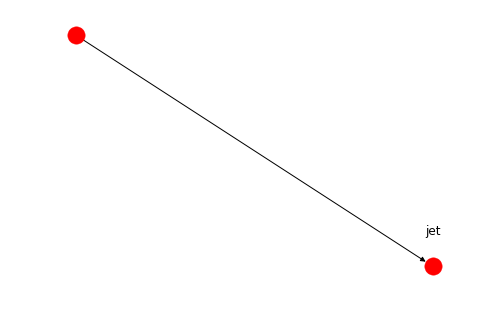

Rule of Length 2:
{ light colorado topaz - swarovski zirconia crystal ear studs } --> { sapphire - swarovski zirconia crystal ear studs }


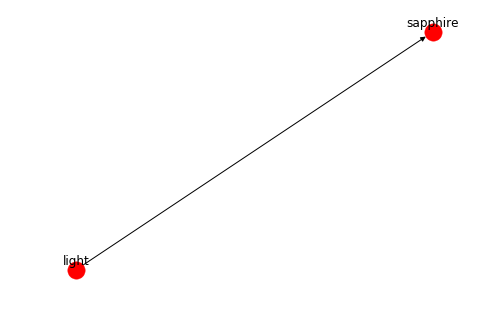

Rule of Length 2:
{ tribal wire wrapped velvet choker } --> { wrappable suede choker }


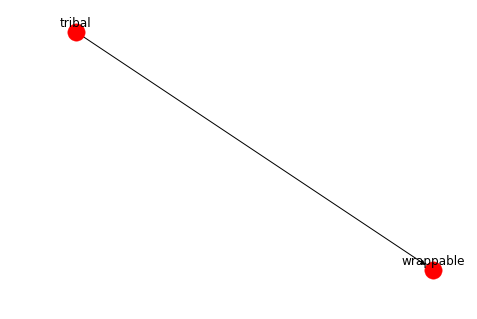

Rule of Length 3:
{ tribal patina earrings,cutout filigree lightweight earrings - rhodium } --> { cutout filigree lightweight earrings - gold }


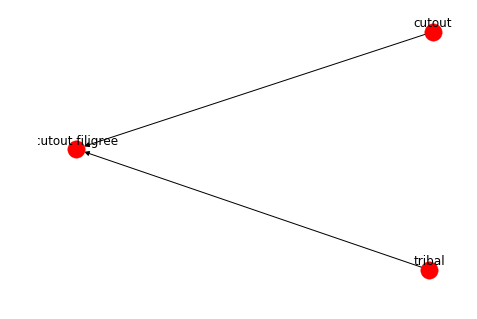

Rule of Length 3:
{ double layered pendant choker,tribal wire wrapped velvet choker - brown } --> { tribal wire wrapped velvet choker - black }


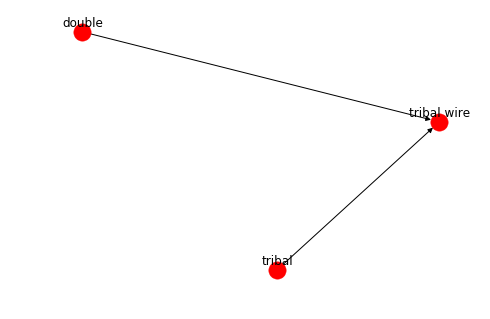

In [269]:
rule_plotter(association.Rule)